# Bearbeitung der Daten

Beschreiben warum machen wir das, wie gehen wir vor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_store = "../data/store.csv"
file_train = "../data/train.csv"

In [5]:
df_store = pd.read_csv(file_store, delimiter=",", encoding="latin", header=0, thousands=",", decimal='.', low_memory=False)
df_train = pd.read_csv(file_train, delimiter=",", encoding="latin", header=0, thousands=",", decimal='.', low_memory=False)

In [6]:
df_merged = pd.merge(df_store, df_train, on='Store')

## Löschen der Einträge Store open ohne Verläufe/Kunden

Was machen wir hier - Auswertung - Beschreiben

In [7]:
# Standardize StateHoliday column
df_merged['StateHoliday'] = df_merged['StateHoliday'].astype(str)

# Remove entries with zero sales and store open
df_merged = df_merged[~((df_merged['Sales'] == 0) & (df_merged['Open'] == 1))]

# Remove entries with zero customers and store open
df_merged = df_merged[~((df_merged['Customers'] == 0) & (df_merged['Open'] == 1))]

# Verify the entries are removed
print("\nTrain Data after removing entries with zero sales and store open:")
print(df_merged[(df_merged['Sales'] == 0) & (df_merged['Open'] == 1)])

print("\nTrain Data after removing entries with zero customers and store open:")
print(df_merged[(df_merged['Customers'] == 0) & (df_merged['Open'] == 1)])


Train Data after removing entries with zero sales and store open:
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []

Train Data after removing entries with zero customers and store open:
Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


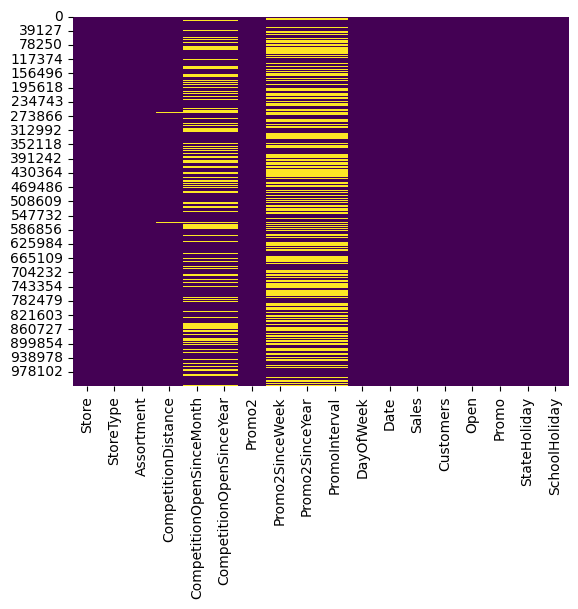

In [8]:
sns.heatmap(df_merged.isnull(), cbar=False, cmap='viridis')
plt.show()

## Korrelationen

Was ist der Unterschied zu den anderen Analysen? einfach nur, dass der Datensatz bearbeitet wurde?

Evt auch noch eine Matrix

In [9]:
numeric_data = df_merged.select_dtypes(include=[np.number])

corr_matrix  = numeric_data.corr()

# change matrix to long format
corr_pairs = corr_matrix.unstack()

# Remove duplicate values
corr_pairs = corr_pairs.reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]

# Sort correlations
corr_pairs['AbsCorrelation'] = np.abs(corr_pairs['Correlation'])
sorted_corr_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Filter correlations (> 0.5)
significant_corr_pairs = sorted_corr_pairs[sorted_corr_pairs['AbsCorrelation'] > 0.5]

print(significant_corr_pairs[['Variable1', 'Variable2', 'Correlation']])

     Variable1  Variable2  Correlation
125  Customers      Sales     0.894700
113      Sales  Customers     0.894700
114      Sales       Open     0.678553
138       Open      Sales     0.678553
139       Open  Customers     0.616835
127  Customers       Open     0.616835
101  DayOfWeek       Open    -0.528968
137       Open  DayOfWeek    -0.528968
